In [1]:
# The functional API in Keras is an alternate way of creating models that offers a lot more flexibility,
# including creating more complex models.
# It specifically allows you to define multiple input or output models as well as models that share layers. More than that,
# it allows you to define ad hoc acyclic network graphs.

## The Library we use to create a function API is keras.models.Model
## There is different way of creating a fucntions API
## Follow are the step we follow
## > We firstly definate the Input layer.
## > Then we create of Build the others conv layers and link then together
## > Finally we define the output layers.
## > Once we have inputs layer and Output layer then we create the model but giving inputs and outputs as its aruguments

## In this code, we will se 2 types of Architectures
## 1.Single Input and Multiple Outputs
## 2.Multiple Inputs and Single Output


In [2]:
# Importing the Dependences

from keras.models import Model
from keras.layers import * # importing all the layers
from keras.utils import plot_model

In [3]:
## Defininig the Input Layer > keras.layers.Input

x = Input(shape=(3,)) # We are defining the shape of Input

In [4]:
## Defininng the others Layers

# First Hidden Layer : In Sequential Model, we use to do , <model_obj>.add(Dense())
# In Fuctional API since we define the Model object after declaring the layers, we direclty use Dense() to deifne and assign it to
# a variable, Now to link the dense layer with input, we just add (Input_Layer_Variable) after the defination of Hidden Layer

hidden1 = Dense(128, activation='relu')(x) # (x) is to link the Hidden Layer1 to the InputLayer

## Second Hidden Layer > To link this layer with Hidden Layer1, we add (hidden1) after the defination.

hidden2 = Dense(64, activation ='relu')(hidden1) # (hidden1) will link this layer with hidden layer 1.


# Functional API Model with Single Input and Multiple Output

In [5]:
# To create multiple output will define output layers and then link then with corresponding hidden layer
# We wil be creating 2 output and link each with the hidden layer2

# Output 1 Link with Hidden Layer 2
Output1 = Dense(1, activation = 'linear')(hidden2)

# Output 2 Linked with Hidden Layer 2
Output2 = Dense(1,activation = 'sigmoid')(hidden2)

Like this We can create Multiple Outputs

In [6]:
# Creating the Model Object by defining Input and Outputs
# We will be using Model() function for this and define inputs and outputs as the arugument to the object.
# We have 1 input stored in x and 2 outputs as Output1 and Output2

model = Model(inputs = x, outputs = [Output1, Output2])

# Checking the Summary

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 128)                  512       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 64)                   8256      ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 1)                    65        ['dense_1[0][0]']             
                                                                                              

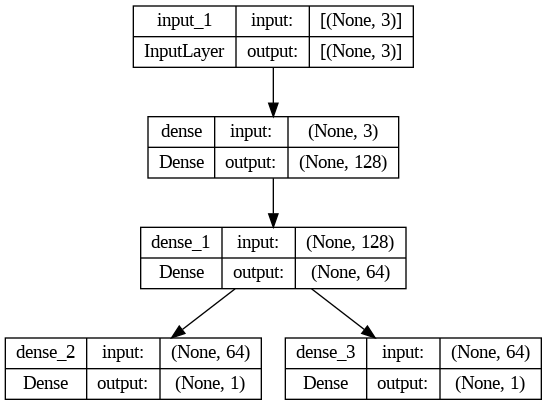

In [7]:
# Plotting the Model >> plot_model() will be used to plot this model and we can check the shape of each layers
# by setting show_shapes argument as True


plot_model(model, show_shapes=True)

In [8]:
## As we can see that we have 2 outputs

# Fuctional API Multiple Input and Single Output

In [14]:
## To create a multiple input and single output Model we will first define 2 inputs and obtain single output by concatenating
## Addition Step will be concatenating the outputs rest remains the same.

In [10]:
# Defining 2 sets of inputs

inputA = Input(shape=(32,)) # Giving different input shapes
inputB = Input(shape=(128,)) # Giving different input shapes

In [12]:
# the first branch operates on first input

x = Dense(8, activation = 'relu')(inputA) # (inputA) will link x with First Input
x1 = Dense(4, activation = 'relu')(x) # (x) will link the sencond hiddent layer x1 with x and inputA

In [13]:
# the second branch operates on second input

y = Dense(64, activation = 'relu')(inputB) # (inputB) will link y with InputB
y1 = Dense(32, activation = 'relu')(y) # (y) will link y1 with y and InputB
y2 = Dense(4, activation = 'relu')(y1) # (y1) will link y2 with y1,y and InputB

In [16]:
# combining the output of 2 branches
# we will used contactenate() for combining the output of 2 branches

combined = concatenate([x1,y2]) # Will combine the outputs of both the branches

In [17]:
## apply 1 FC layers and then perform regression prediction on the combined output

# applying 1 FC layer to the combined output

z = Dense(2, activation = 'relu')(combined) #(combined) with link the hidden layer 'z' with combined output

# creating the output layer

Output = Dense(1, activation = 'linear')(z) # (z) will link the output layer with z

In [18]:
# creating the Model Object

# our model will accept 2 inputs and then predict the single output

model1 = Model(inputs = [inputA,inputB], outputs = Output)

# checking the summary

model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 64)                   8256      ['input_3[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 8)                    264       ['input_2[0][0]']             
                                                                                            

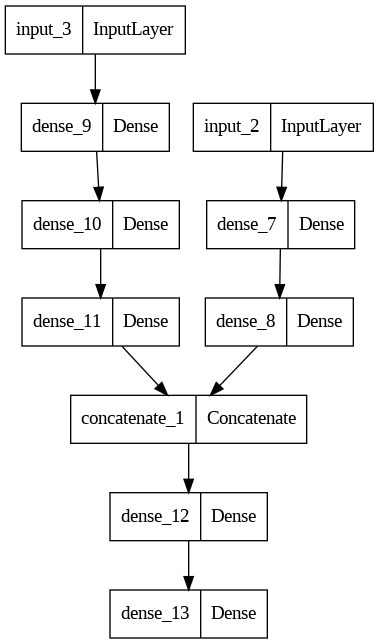

In [19]:
## Plotting the model

plot_model(model1)

In [20]:
# So this is Our Model with 2 inputs and 1 Output